In [2]:
# import
import rembg
import cv2
import numpy as np
import matplotlib.pyplot as plt

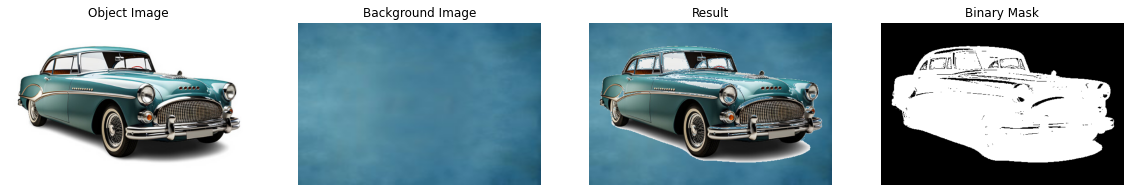

In [24]:
def image_matting(object_image_path, background_image_path):
    # Read the object image
    object_image = cv2.imread(object_image_path)
    object_image = cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB)
    
    # Read the background image
    background_image = cv2.imread(background_image_path)
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

    # Resize the background image to match the object image size
    background_image = cv2.resize(background_image, (object_image.shape[1], object_image.shape[0]))

    # Convert object image to grayscale
    gray = cv2.cvtColor(object_image, cv2.COLOR_RGB2GRAY)
    
    # Thresholding to get a binary mask
    ret, binary_mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
    
    # Invert binary mask
    binary_mask = cv2.bitwise_not(binary_mask)
    
    # Convert binary mask to alpha matte
    alpha_matte = binary_mask.astype(np.float32) / 255.0
    
    # Composite object image and background image using alpha matte
    result = np.zeros_like(object_image, dtype=np.uint8)
    for i in range(3):
        result[:,:,i] = alpha_matte * object_image[:,:,i] + (1 - alpha_matte) * background_image[:,:,i]
    
    return object_image, background_image, result, binary_mask

def plot_images(object_image, background_image, result_image, binary_mask):
    plt.figure(figsize=(20, 8))
    
    # Object image
    plt.subplot(1, 4, 1)
    plt.imshow(object_image)
    plt.title('Object Image')
    plt.axis('off')
    
    # Background image
    plt.subplot(1, 4, 2)
    plt.imshow(background_image)
    plt.title('Background Image')
    plt.axis('off')

    # Binary mask
    plt.subplot(1, 4, 4)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask')
    plt.axis('off')
    
    # Result image
    plt.subplot(1, 4, 3)
    plt.imshow(result_image)
    plt.title('Result')
    plt.axis('off')
    
  
    
    plt.show()

object_image_path = 'car.jpg'  # Replace with your object image file path
background_image_path = 'bg.jpg'  # Replace with your background image file path

object_image, background_image, result_image, binary_mask = image_matting(object_image_path, background_image_path)
plot_images(object_image, background_image, result_image, binary_mask)


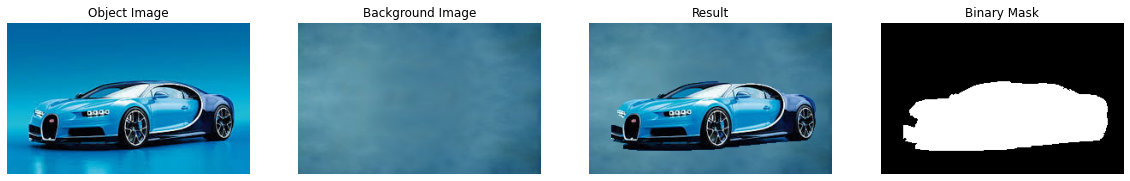

In [25]:
def image_matting(object_image_path, background_image_path):
    # Read the object image
    object_image = cv2.imread(object_image_path)
    object_image = cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB)
    
    # Read the background image
    background_image = cv2.imread(background_image_path)
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

    # Resize the background image to match the object image size
    background_image = cv2.resize(background_image, (object_image.shape[1], object_image.shape[0]))

    # Create a mask initialized as background
    mask = np.zeros(object_image.shape[:2], np.uint8)
    mask[:,:] = cv2.GC_PR_BGD  # Set all pixels to probable background

    # Define a rectangle enclosing the object
    rect = (10, 10, object_image.shape[1] - 20, object_image.shape[0] - 20)  # (x, y, width, height)

    # Apply GrabCut to refine the mask
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    cv2.grabCut(object_image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Create a binary mask where probable and definite foreground pixels are set to 1
    binary_mask = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype(np.uint8) * 255

    # Convert binary mask to alpha matte
    alpha_matte = binary_mask.astype(np.float32) / 255.0
    
    # Composite object image and background image using alpha matte
    result = np.zeros_like(object_image, dtype=np.uint8)
    for i in range(3):
        result[:,:,i] = alpha_matte * object_image[:,:,i] + (1 - alpha_matte) * background_image[:,:,i]
    
    return object_image, background_image, result, binary_mask



def plot_images(object_image, background_image, result_image, binary_mask):
    plt.figure(figsize=(20, 8))
    
    # Object image
    plt.subplot(1, 4, 1)
    plt.imshow(object_image)
    plt.title('Object Image')
    plt.axis('off')
    
    # Background image
    plt.subplot(1, 4, 2)
    plt.imshow(background_image)
    plt.title('Background Image')
    plt.axis('off')

    # Binary mask
    plt.subplot(1, 4, 4)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask')
    plt.axis('off')
    
    # Result image
    plt.subplot(1, 4, 3)
    plt.imshow(result_image)
    plt.title('Result')
    plt.axis('off')
    
  
    
    plt.show()

object_image_path = 'test2.jpeg'  # Replace with your object image file path
background_image_path = 'bg.jpg'  # Replace with your background image file path

object_image, background_image, result_image, binary_mask = image_matting(object_image_path, background_image_path)
plot_images(object_image, background_image, result_image, binary_mask)


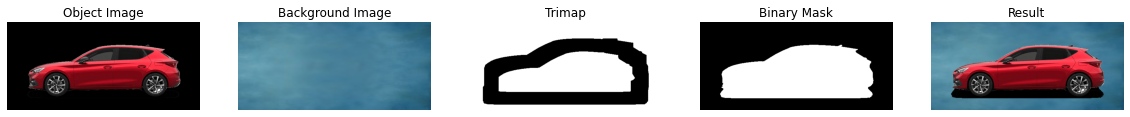

In [29]:
def image_matting(object_image_path, background_image_path):
    # Read the object image
    object_image = cv2.imread(object_image_path)
    object_image = cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB)
    
    # Read the background image
    background_image = cv2.imread(background_image_path)
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

    # Resize the background image to match the object image size
    background_image = cv2.resize(background_image, (object_image.shape[1], object_image.shape[0]))

    # Create a mask initialized as background
    mask = np.zeros(object_image.shape[:2], np.uint8)
    mask[:,:] = cv2.GC_PR_BGD  # Set all pixels to probable background

    # Define a rectangle enclosing the object
    rect = (10, 10, object_image.shape[1] - 20, object_image.shape[0] - 20)  # (x, y, width, height)

    # Apply GrabCut to refine the mask
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    cv2.grabCut(object_image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Create a binary mask where probable and definite foreground pixels are set to 1
    binary_mask = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype(np.uint8) * 255

    # Convert binary mask to alpha matte
    alpha_matte = binary_mask.astype(np.float32) / 255.0
    
    # Create trimap by dilating and then eroding the binary mask
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary_mask, kernel, iterations=10)
    eroded = cv2.erode(binary_mask, kernel, iterations=10)
    trimap = np.where((dilated == 255) & (eroded == 0), 127, 255).astype(np.uint8)

    # Composite object image and background image using alpha matte
    result = np.zeros_like(object_image, dtype=np.uint8)
    for i in range(3):
        result[:,:,i] = alpha_matte * object_image[:,:,i] + (1 - alpha_matte) * background_image[:,:,i]
    
    return object_image, background_image, result, binary_mask, trimap

def plot_images(object_image, background_image, result_image, binary_mask, trimap):
    plt.figure(figsize=(20, 8))
    
    # Object image
    plt.subplot(1, 5, 1)
    plt.imshow(object_image)
    plt.title('Object Image')
    plt.axis('off')
    
    # Background image
    plt.subplot(1, 5, 2)
    plt.imshow(background_image)
    plt.title('Background Image')
    plt.axis('off')

    # Binary mask
    plt.subplot(1, 5, 4)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask')
    plt.axis('off')
    
    # Trimap
    plt.subplot(1, 5, 3)
    plt.imshow(trimap, cmap='gray')
    plt.title('Trimap')
    plt.axis('off')
    
    # Result image
    plt.subplot(1, 5, 5)
    plt.imshow(result_image)
    plt.title('Result')
    plt.axis('off')
    
    plt.show()

object_image_path = 'car.png'  # Replace with your object image file path
background_image_path = 'bg.jpg'  # Replace with your background image file path

object_image, background_image, result_image, binary_mask, trimap = image_matting(object_image_path, background_image_path)
plot_images(object_image, background_image, result_image, binary_mask, trimap)


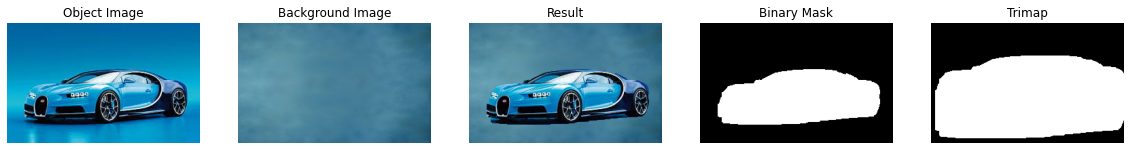

In [3]:

def image_matting(object_image_path, background_image_path):
    # Read the object image
    object_image = cv2.imread(object_image_path)
    object_image = cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB)
    
    # Read the background image
    background_image = cv2.imread(background_image_path)
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

    # Resize the background image to match the object image size
    background_image = cv2.resize(background_image, (object_image.shape[1], object_image.shape[0]))

    # Create a mask initialized as background
    mask = np.zeros(object_image.shape[:2], np.uint8)
    mask[:,:] = cv2.GC_PR_BGD  # Set all pixels to probable background

    # Define a rectangle enclosing the object
    rect = (10, 10, object_image.shape[1] - 20, object_image.shape[0] - 20)  # (x, y, width, height)

    # Apply GrabCut to refine the mask
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    cv2.grabCut(object_image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Create a binary mask where probable and definite foreground pixels are set to 1
    binary_mask = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype(np.uint8) * 255

    # Convert binary mask to alpha matte
    alpha_matte = binary_mask.astype(np.float32) / 255.0
    
    # Create trimap by dilating and then eroding the binary mask
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary_mask, kernel, iterations=10)
    eroded = cv2.erode(binary_mask, kernel, iterations=10)
    trimap = np.where((dilated == 255), 255, np.where((eroded == 0), 0, 127)).astype(np.uint8)

    # Composite object image and background image using alpha matte
    result = np.zeros_like(object_image, dtype=np.uint8)
    for i in range(3):
        result[:,:,i] = alpha_matte * object_image[:,:,i] + (1 - alpha_matte) * background_image[:,:,i]
    
    return object_image, background_image, result, binary_mask, trimap

def plot_images(object_image, background_image, result_image, binary_mask, trimap):
    plt.figure(figsize=(20, 8))
    
    # Object image
    plt.subplot(1, 5, 1)
    plt.imshow(object_image)
    plt.title('Object Image')
    plt.axis('off')
    
    # Background image
    plt.subplot(1, 5, 2)
    plt.imshow(background_image)
    plt.title('Background Image')
    plt.axis('off')

    # Binary mask
    plt.subplot(1, 5, 4)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask')
    plt.axis('off')
    
    # Trimap
    plt.subplot(1, 5, 5)
    plt.imshow(trimap, cmap='gray')
    plt.title('Trimap')
    plt.axis('off')
    
    # Result image
    plt.subplot(1, 5, 3)
    plt.imshow(result_image)
    plt.title('Result')
    plt.axis('off')
    
    plt.show()

object_image_path = 'test2.jpeg'  # Replace with your object image file path
background_image_path = 'bg.jpg'  # Replace with your background image file path

object_image, background_image, result_image, binary_mask, trimap = image_matting(object_image_path, background_image_path)
plot_images(object_image, background_image, result_image, binary_mask, trimap)


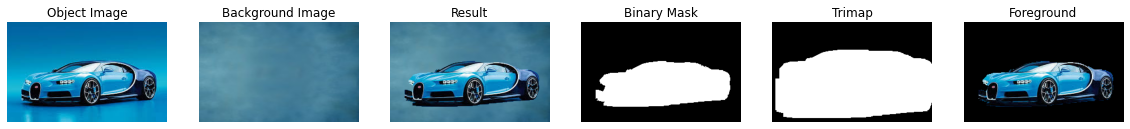

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_matting(object_image_path, background_image_path):
    # Read the object image
    object_image = cv2.imread(object_image_path)
    object_image = cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB)
    
    # Read the background image
    background_image = cv2.imread(background_image_path)
    background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

    # Resize the background image to match the object image size
    background_image = cv2.resize(background_image, (object_image.shape[1], object_image.shape[0]))

    # Create a mask initialized as background
    mask = np.zeros(object_image.shape[:2], np.uint8)
    mask[:,:] = cv2.GC_PR_BGD  # Set all pixels to probable background
    rect = (10, 10, object_image.shape[1] - 20, object_image.shape[0] - 20)  # (x, y, width, height)

    # Apply GrabCut to refine the mask
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    cv2.grabCut(object_image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Create a binary mask where probable and definite foreground pixels are set to 1
    binary_mask = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype(np.uint8) * 255

    # Convert binary mask to alpha matte
    alpha_matte = binary_mask.astype(np.float32) / 255.0
    
    # Create trimap by dilating and then eroding the binary mask
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary_mask, kernel, iterations=10)
    eroded = cv2.erode(binary_mask, kernel, iterations=10)
    trimap = np.where((dilated == 255), 255, np.where((eroded == 0), 0, 127)).astype(np.uint8)

    # Composite object image and background image using alpha matte
    result = np.zeros_like(object_image, dtype=np.uint8)
    for i in range(3):
        result[:,:,i] = alpha_matte * object_image[:,:,i] + (1 - alpha_matte) * background_image[:,:,i]
    
    return object_image, background_image, result, binary_mask, trimap

def plot_images(object_image, background_image, result_image, binary_mask, trimap):
    plt.figure(figsize=(20, 8))
    
    # Object image
    plt.subplot(1, 6, 1)
    plt.imshow(object_image)
    plt.title('Object Image')
    plt.axis('off')
    
    # Background image
    plt.subplot(1, 6, 2)
    plt.imshow(background_image)
    plt.title('Background Image')
    plt.axis('off')

    # Binary mask
    plt.subplot(1, 6, 4)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask')
    plt.axis('off')
    
    # Trimap
    plt.subplot(1, 6, 5)
    plt.imshow(trimap, cmap='gray')
    plt.title('Trimap')
    plt.axis('off')
    
    # Result image
    plt.subplot(1, 6, 3)
    plt.imshow(result_image)
    plt.title('Result')
    plt.axis('off')
    
    # Foreground
    foreground = np.zeros_like(object_image)
    for i in range(3):
        foreground[:,:,i] = np.where(binary_mask == 255, result_image[:,:,i], 0)
    plt.subplot(1, 6, 6)
    plt.imshow(foreground)
    plt.title('Foreground')
    plt.axis('off')

    plt.show()

object_image_path = 'test2.jpeg'  # Replace with your object image file path
background_image_path = 'bg.jpg'  # Replace with your background image file path

object_image, background_image, result_image, binary_mask, trimap = image_matting(object_image_path, background_image_path)
plot_images(object_image, background_image, result_image, binary_mask, trimap)


Composite image saved to path/to/save/composite/image.png


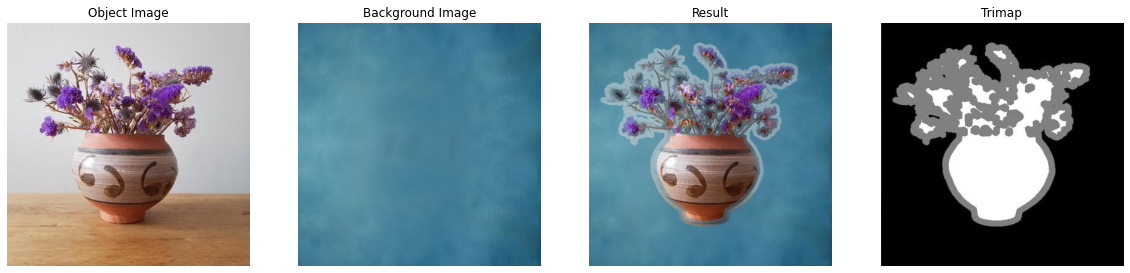

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_images(input_image_path, background_image_path, trimap_path):
    input_image = cv2.imread(input_image_path, cv2.IMREAD_COLOR)
    background_image = cv2.imread(background_image_path, cv2.IMREAD_COLOR)
    trimap = cv2.imread(trimap_path, cv2.IMREAD_GRAYSCALE)
    
    return input_image, background_image, trimap

def create_matte_from_trimap(trimap):
    # Normalize trimap to the range [0, 1]
    alpha_matte = trimap / 255.0
    return alpha_matte

def blend_with_background(foreground, background, alpha_matte):
    alpha_matte = np.repeat(alpha_matte[:, :, np.newaxis], 3, axis=2)
    foreground = foreground.astype(float)
    background = cv2.resize(background, (foreground.shape[1], foreground.shape[0])).astype(float)
    composite = alpha_matte * foreground + (1 - alpha_matte) * background
    return composite.astype(np.uint8)

def plot_images(object_image, background_image, result_image, trimap):
    plt.figure(figsize=(20, 8))
    
    # Object image
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB))
    plt.title('Object Image')
    plt.axis('off')
    
    # Background image
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB))
    plt.title('Background Image')
    plt.axis('off')

    # Result image
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Result')
    plt.axis('off')

    # Trimap
    plt.subplot(1, 4, 4)
    plt.imshow(trimap, cmap='gray')
    plt.title('Trimap')
    plt.axis('off')
    
    plt.show()

def main(input_image_path, background_image_path, trimap_path, output_path):
    input_image, background_image, trimap = load_images(input_image_path, background_image_path, trimap_path)
    alpha_matte = create_matte_from_trimap(trimap)
    composite_image = blend_with_background(input_image, background_image, alpha_matte)
    cv2.imwrite(output_path, composite_image)
    print(f"Composite image saved to {output_path}")
    
    # Plot the images
    plot_images(input_image, background_image, composite_image, trimap)

if __name__ == "__main__":
    input_image_path = "image.jpg"
    background_image_path = "bg.jpg"
    trimap_path = "trimap.jpg"
    output_path = "path/to/save/composite/image.png"
    main(input_image_path, background_image_path, trimap_path, output_path)


Composite image saved to composite_image.png


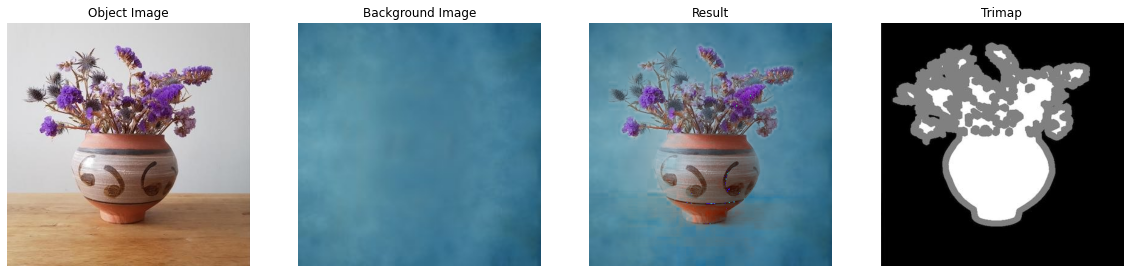

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_images(input_image_path, background_image_path, trimap_path):
    input_image = cv2.imread(input_image_path, cv2.IMREAD_COLOR)
    background_image = cv2.imread(background_image_path, cv2.IMREAD_COLOR)
    trimap = cv2.imread(trimap_path, cv2.IMREAD_GRAYSCALE)
    
    return input_image, background_image, trimap

def create_matte_from_trimap(trimap):
    # Normalize trimap to the range [0, 1]
    alpha_matte = trimap / 255.0
    return alpha_matte

def refine_matte(input_image, alpha_matte):
    # Convert alpha_matte to CV_32F
    alpha_matte = alpha_matte.astype(np.float32)
    # Guided filter to refine the alpha matte
    refined_matte = cv2.ximgproc.guidedFilter(input_image, alpha_matte, radius=60, eps=1e-6)
    return refined_matte

def blend_with_background(foreground, background, alpha_matte):
    alpha_matte = np.repeat(alpha_matte[:, :, np.newaxis], 3, axis=2)
    foreground = foreground.astype(float)
    background = cv2.resize(background, (foreground.shape[1], foreground.shape[0])).astype(float)
    composite = alpha_matte * foreground + (1 - alpha_matte) * background
    return composite.astype(np.uint8)

def plot_images(object_image, background_image, result_image, trimap):
    plt.figure(figsize=(20, 8))
    
    # Object image
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB))
    plt.title('Object Image')
    plt.axis('off')
    
    # Background image
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB))
    plt.title('Background Image')
    plt.axis('off')

    # Result image
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Result')
    plt.axis('off')

    # Trimap
    plt.subplot(1, 4, 4)
    plt.imshow(trimap, cmap='gray')
    plt.title('Trimap')
    plt.axis('off')
    
    plt.show()

def main(input_image_path, background_image_path, trimap_path, output_path):
    input_image, background_image, trimap = load_images(input_image_path, background_image_path, trimap_path)
    alpha_matte = create_matte_from_trimap(trimap)
    refined_alpha_matte = refine_matte(input_image, alpha_matte)
    composite_image = blend_with_background(input_image, background_image, refined_alpha_matte)
    cv2.imwrite(output_path, composite_image)
    print(f"Composite image saved to {output_path}")
    
    # Plot the images
    plot_images(input_image, background_image, composite_image, trimap)

if __name__ == "__main__":
    input_image_path = "image.jpg"  # Replace with your input image path
    background_image_path = "bg.jpg"  # Replace with your background image path
    trimap_path = "trimap.jpg"  # Replace with your trimap image path
    output_path = "composite_image.png"  # Replace with the path to save the composite image
    main(input_image_path, background_image_path, trimap_path, output_path)
